In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [6]:
sns.set_theme(style="whitegrid", palette="pastel")    

In [10]:
df = pd.read_csv("../data/sales-data-sales.csv", index_col=0)

In [11]:
df

,date,clientId,clientName,clientType,productId,productName,productCategory,productPrice,saleAmount,saleDiscount
0,2024-01-01,93997,John Doe,Premium,7540,Widget Deluxe,Gadgets,20166.428668,22041.330842,10%
1,2024-01-01,14598,John Doe,Premium,4244,Widget Deluxe,Gadgets,10873.545341,16016.230828,10%
2,2024-01-01,10912,John Doe,Premium,5440,Widget Deluxe,Gadgets,17934.474018,17794.746899,10%
3,2024-01-01,52090,John Doe,Premium,1922,Widget Deluxe,Gadgets,12543.699684,12678.875514,10%
4,2024-01-01,614,John Doe,Premium,3747,Widget Deluxe,Gadgets,14231.398746,10736.519978,10%
...,...,...,...,...,...,...,...,...,...,...
995,2024-01-01,54000,John Doe,Premium,8529,Widget Deluxe,Gadgets,14591.152161,22987.916024,10%
996,2024-01-01,31113,John Doe,Premium,5675,Widget Deluxe,Gadgets,11496.816276,10150.748499,10%
997,2024-01-01,20086,John Doe,Premium,7086,Widget Deluxe,Gadgets,15842.350130,20766.835107,10%
998,2024-01-01,49479,John Doe,Premium,3304,Widget Deluxe,Gadgets,7328.669323,16523.721965,10%


In [12]:
df.describe(include="all")

,date,clientId,clientName,clientType,productId,productName,productCategory,productPrice,saleAmount,saleDiscount
count,1000,1000.000000,1000,1000,1000.000000,1000,1000,1000.000000,1000.000000,1000
unique,1,NaN,1,1,NaN,1,1,NaN,NaN,1
top,2024-01-01,NaN,John Doe,Premium,NaN,Widget Deluxe,Gadgets,NaN,NaN,10%
freq,1000,NaN,1000,1000,NaN,1000,1000,NaN,NaN,1000
mean,NaN,49145.077000,NaN,NaN,5000.865000,NaN,NaN,13959.682633,13623.277179,NaN
std,NaN,29549.610791,NaN,NaN,1465.562274,NaN,NaN,4062.722343,5053.223841,NaN
min,NaN,119.000000,NaN,NaN,-65.000000,NaN,NaN,2600.081018,-3178.983216,NaN
25%,NaN,23581.250000,NaN,NaN,4064.500000,NaN,NaN,11178.756737,10292.320856,NaN
50%,NaN,48660.000000,NaN,NaN,5042.500000,NaN,NaN,13778.389568,13667.678239,NaN
75%,NaN,76227.000000,NaN,NaN,5929.500000,NaN,NaN,16892.637934,16826.257277,NaN


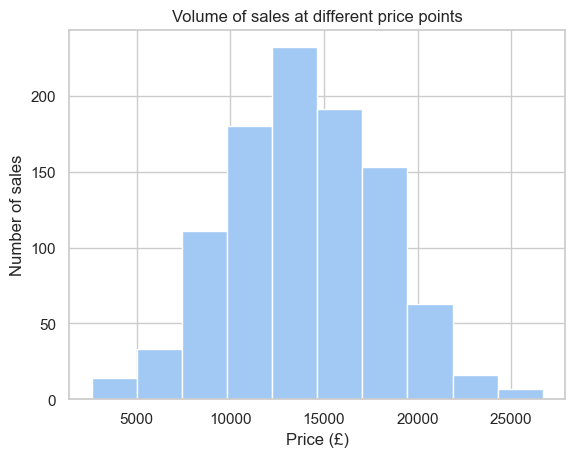

In [16]:
fig, ax = plt.subplots()

ax.hist(df["productPrice"], bins=10)

ax.set_title("Volume of sales at different price points")
ax.set_xlabel("Price (£)")
ax.set_ylabel("Number of sales")

plt.show()